In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [65]:
## provide the path for testing cofing file and tained model form colab
net = cv2.dnn.readNetFromDarknet("yolov3_custom.cfg",r"yolov3_custom_1000.weights")

In [66]:
### Change here for custom classes for trained model 

# classes = ['elon','obama','mark']
classes=[]
with open('classes.names','r') as f:
    classes=[line.strip() for line in f.readlines()]

In [67]:
classes

['elon', 'mark', 'obama']

In [68]:
# mE:\Images\custom_data
img = cv2.imread('2.jpg')

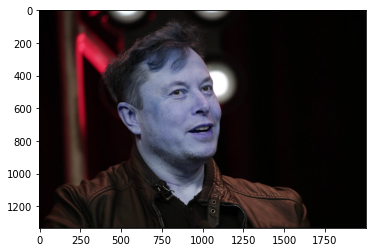

In [69]:
plt.imshow(img)

In [71]:
# eidth, height and rgb channel will be stored
wt,ht, _ = img.shape

In [74]:
blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

In [75]:
blob.shape

(1, 3, 416, 416)

In [78]:
net.setInput(blob)

In [79]:
output_layers_name = net.getUnconnectedOutLayersNames()

In [86]:
layerOutputs = net.forward(output_layers_name)

In [81]:
boxes =[]
confidences = []
class_ids = []

In [82]:
for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * wt)
                center_y = int(detection[1] * ht)
                w = int(detection[2] * wt)
                h = int(detection[3]* ht)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

In [88]:
 indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)

In [89]:
 indexes 

()

In [87]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size =(len(boxes),3))

In [16]:
cap = cv2.VideoCapture(0)

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(1280,720))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net.setInput(blob)

    output_layers_name = net.getUnconnectedOutLayersNames()

    layerOutputs = net.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)


    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)

    cv2.imshow('img',img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
